<a href="https://colab.research.google.com/github/thopiyawan/DEMO_rami_dialogflow/blob/master/homework_62199130237_computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pylab as plt

In [5]:
from google.colab import drive 
drive.mount('/content/gdrive')

image = Image.open("/content/gdrive/My Drive/2020-lecture/DS534-image/hw/IMG_TEST.jpg")

Mounted at /content/gdrive


In [6]:
print(image.width,image.height,image.mode,image.format, type(image))

640 852 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


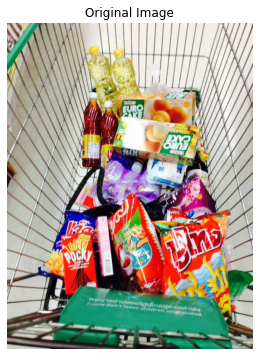

In [7]:
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

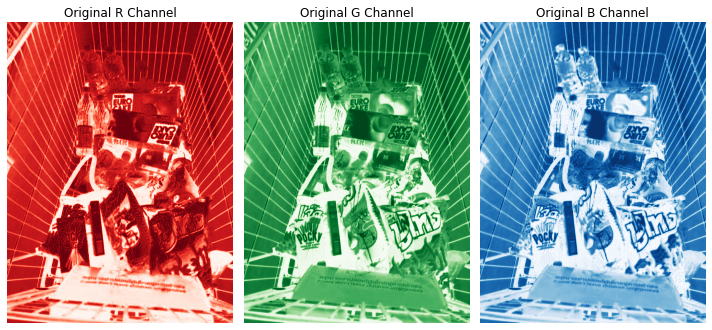

In [10]:
ch_r, ch_g, ch_b = image.split()

plt.figure(figsize=(10,6))
plt.subplot(1,3,1); plt.imshow(ch_r, cmap=plt.cm.Reds); plt.axis('off');plt.title('Original R Channel')
plt.subplot(1,3,2); plt.imshow(ch_g, cmap=plt.cm.Greens); plt.axis('off');plt.title('Original G Channel')
plt.subplot(1,3,3); plt.imshow(ch_b, cmap=plt.cm.Blues); plt.axis('off');plt.title('Original B Channel')
plt.tight_layout()
plt.show()

In [11]:
image_g = image.convert('L')
image_g.save('IMG_TEST_GRAY.jpg')
image2 = Image.open("IMG_TEST_GRAY.jpg")
print(image2.width,image2.height,image2.mode,image2.format, type(image2))

640 852 L JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


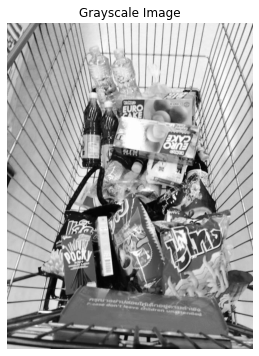

In [13]:
plt.figure(figsize=(10,6))
plt.imshow(image2,'gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [14]:
image_g = image.convert('1')
image_g.save('IMG_TEST_BW.jpg')
image3 = Image.open("IMG_TEST_BW.jpg")
print(image3.width,image3.height,image3.mode,image3.format, type(image3))

640 852 L JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


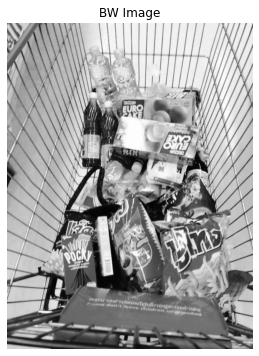

In [15]:
plt.figure(figsize=(10,6))
plt.imshow(image2,'gray')
plt.title('BW Image')
plt.axis('off')
plt.show()

In [20]:
pip install pydicom

In [24]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

filename = get_testdata_files('CT_small.dcm')[0]
dataset = pydicom.dcmread(filename)

Automatically created module for IPython interactive environment


In [26]:
print()
print("Filename.............:", filename)
print("Storge type..........:", dataset.SOPClassUID)

pat_name = dataset.PatientName
display_name = pat_name.family_name +","+pat_name.given_name
print()
print("Patient's name.......:", display_name)
print("Patient id...........:", dataset.PatientID)
print("Modality.............:", dataset.Modality)
print("Study Date...........:", dataset.StudyDate)


Filename.............: /usr/local/lib/python3.6/dist-packages/pydicom/data/test_files/CT_small.dcm
Storge type..........: 1.2.840.10008.5.1.4.1.1.2

Patient's name.......: CompressedSamples,CT1
Patient id...........: 1CT1
Modality.............: CT
Study Date...........: 20040119


In [28]:
if 'PixelData' in dataset:
  rows = int(dataset.Rows)
  cols = int(dataset.Columns)
  print()
  print("Image size..............: {rows:d} x {cols:d}, {size:d} bytes".format(rows=rows, cols=cols, size=len(dataset.PixelData)))
  print("Image thickness.........:", dataset.SliceThickness)
  print("Pixel Spacing...........:",dataset.PixelSpacing)
if 'PixelSpacing' in dataset:
  print()
  print("Pixel Spacing...........:",dataset.PixelSpacing)
print()
print("Slice location.........:", dataset.get('SliceLocation', "(missing"))


Image size..............: 128 x 128, 32768 bytes
Image thickness.........: 5.000000
Pixel Spacing...........: [0.661468, 0.661468]

Pixel Spacing...........: [0.661468, 0.661468]

Slice location.........: -77.2040634155


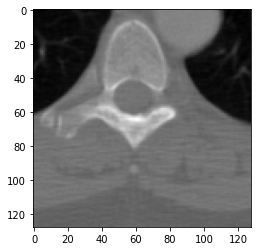

In [29]:
plt.imshow(dataset.pixel_array, cmap = plt.cm.gray)
plt.show()

**Resolution Nearest neighbor** 

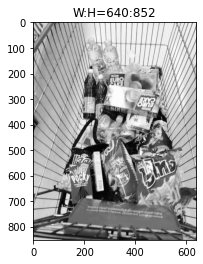

In [30]:
image = Image.open("IMG_TEST_GRAY.jpg")
plt.title("W:H=" +str(image.width)+ ":"+str(image.height))
plt.imshow(image, 'gray')

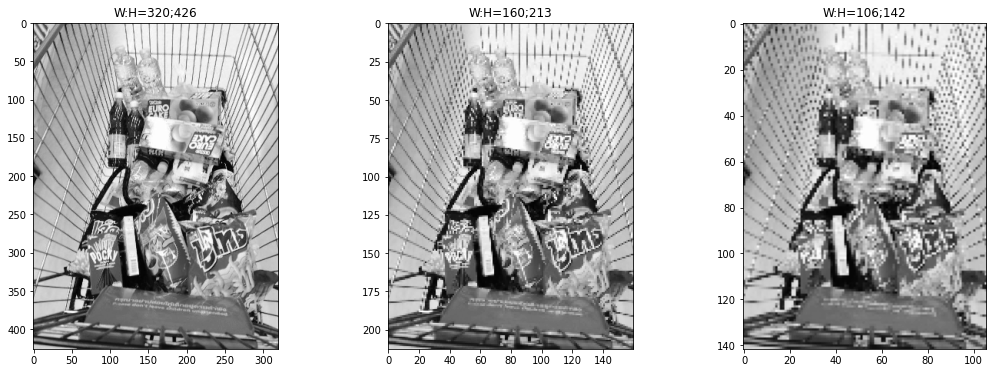

In [37]:
image_2 = image.resize((int(image.width/2), int(image.height/2)), Image.NEAREST)
image_4 = image.resize((int(image.width/4), int(image.height/4)), Image.NEAREST)
image_6 = image.resize((int(image.width/6), int(image.height/6)), Image.NEAREST)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1);
plt.title("W:H=" +str(image_2.width)+ ";"+str(image_2.height))
plt.imshow(image_2, 'gray')


plt.subplot(1,3,2);
plt.title("W:H="+str(image_4.width)+";"+str(image_4.height))
plt.imshow(image_4, 'gray')

plt.subplot(1,3,3);
plt.title("W:H="+str(image_6.width)+";"+str(image_6.height))
plt.imshow(image_6, 'gray')

plt.show()

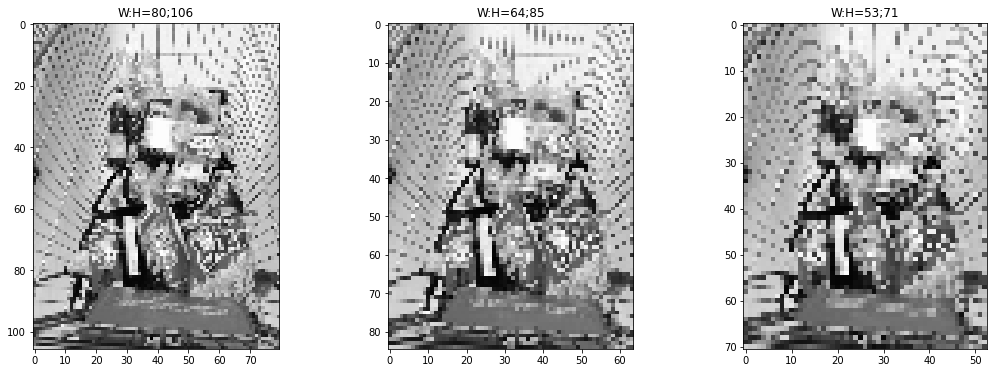

In [38]:
image_2 = image.resize((int(image.width/8), int(image.height/8)), Image.NEAREST)
image_4 = image.resize((int(image.width/10), int(image.height/10)), Image.NEAREST)
image_6 = image.resize((int(image.width/12), int(image.height/12)), Image.NEAREST)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1);
plt.title("W:H=" +str(image_2.width)+ ";"+str(image_2.height))
plt.imshow(image_2, 'gray')


plt.subplot(1,3,2);
plt.title("W:H="+str(image_4.width)+";"+str(image_4.height))
plt.imshow(image_4, 'gray')

plt.subplot(1,3,3);
plt.title("W:H="+str(image_6.width)+";"+str(image_6.height))
plt.imshow(image_6, 'gray')

plt.show()

**Resolution Bilinear** 


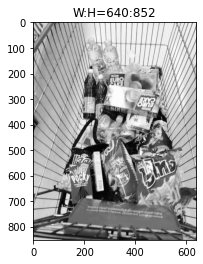

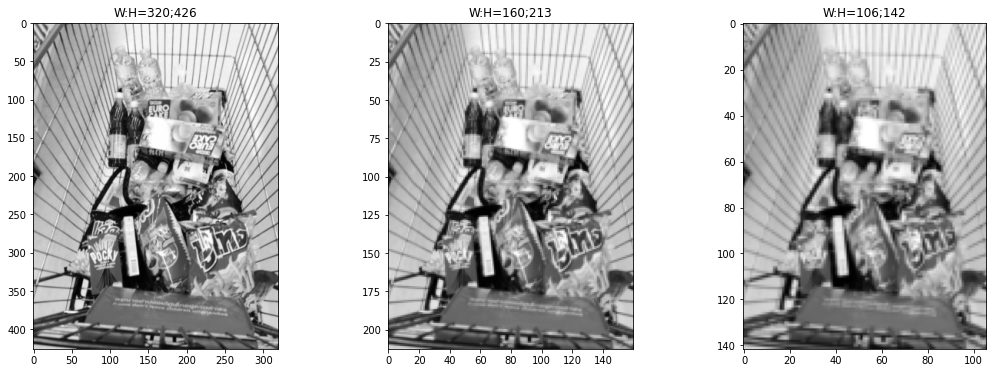

In [39]:
image = Image.open("IMG_TEST_GRAY.jpg")
plt.title("W:H=" +str(image.width)+ ":"+str(image.height))
plt.imshow(image, 'gray')

image_2 = image.resize((int(image.width/2), int(image.height/2)), Image.BILINEAR)
image_4 = image.resize((int(image.width/4), int(image.height/4)), Image.BILINEAR)
image_6 = image.resize((int(image.width/6), int(image.height/6)), Image.BILINEAR)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1);
plt.title("W:H=" +str(image_2.width)+ ";"+str(image_2.height))
plt.imshow(image_2, 'gray')


plt.subplot(1,3,2);
plt.title("W:H="+str(image_4.width)+";"+str(image_4.height))
plt.imshow(image_4, 'gray')

plt.subplot(1,3,3);
plt.title("W:H="+str(image_6.width)+";"+str(image_6.height))
plt.imshow(image_6, 'gray')

plt.show()

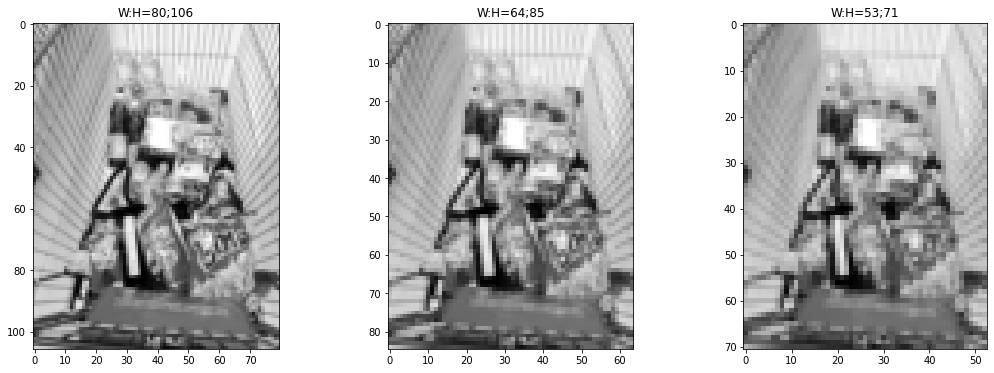

In [40]:
image_2 = image.resize((int(image.width/8), int(image.height/8)), Image.BILINEAR)
image_4 = image.resize((int(image.width/10), int(image.height/10)), Image.BILINEAR)
image_6 = image.resize((int(image.width/12), int(image.height/12)), Image.BILINEAR)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1);
plt.title("W:H=" +str(image_2.width)+ ";"+str(image_2.height))
plt.imshow(image_2, 'gray')


plt.subplot(1,3,2);
plt.title("W:H="+str(image_4.width)+";"+str(image_4.height))
plt.imshow(image_4, 'gray')

plt.subplot(1,3,3);
plt.title("W:H="+str(image_6.width)+";"+str(image_6.height))
plt.imshow(image_6, 'gray')

plt.show()

**Resolution reducing**





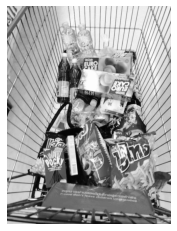

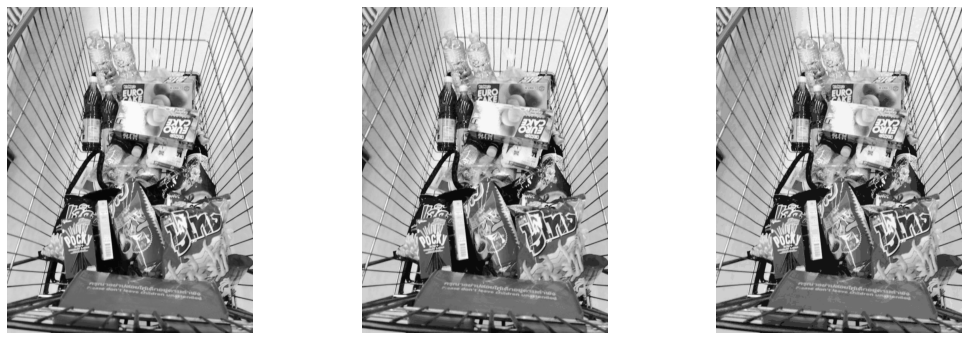

In [41]:
image = Image.open("IMG_TEST_GRAY.jpg")
# plt.title("W:H=" +str(image.width)+ ":"+str(image.height))
plt.imshow(image, 'gray'), plt.axis('off')

# image_2 = image.resize((int(image.width/2), int(image.height/2)), Image.BILINEAR)
# image_4 = image.resize((int(image.width/4), int(image.height/4)), Image.BILINEAR)
# image_6 = image.resize((int(image.width/6), int(image.height/6)), Image.BILINEAR)
image_2 = image.quantize(colors=64)
image_4 = image.quantize(colors=32)
image_6 = image.quantize(colors=16)
plt.figure(figsize=(18,6))
plt.subplot(1,3,1);
plt.imshow(image_2, 'gray')
plt.axis('off')

plt.subplot(1,3,2);
plt.imshow(image_4, 'gray')
plt.axis('off')

plt.subplot(1,3,3);
plt.imshow(image_6, 'gray')
plt.axis('off')

plt.show()

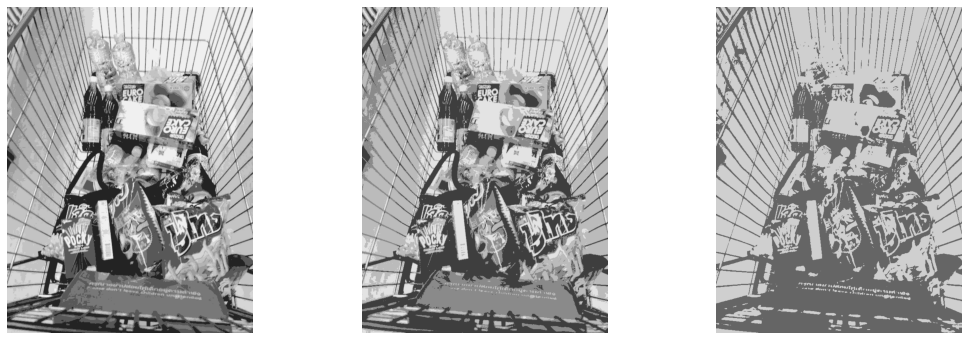

In [42]:
image_2 = image.quantize(colors=8)
image_4 = image.quantize(colors=4)
image_6 = image.quantize(colors=2)
plt.figure(figsize=(18,6))
plt.subplot(1,3,1);
plt.imshow(image_2, 'gray')
plt.axis('off')

plt.subplot(1,3,2);
plt.imshow(image_4, 'gray')
plt.axis('off')

plt.subplot(1,3,3);
plt.imshow(image_6, 'gray')
plt.axis('off')

plt.show()